# 优化

减少开销。

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

model_path="/models/stable-diffusion-v1-5"

pipeline = AutoPipelineForText2Image.from_pretrained(model_path, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipeline.unet = torch.compile(pipeline.unet, mode="reduce-overhead", fullgraph=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


mode="reduce-overhead" -- 第一次执行会很慢。

  0%|          | 0/50 [00:00<?, ?it/s]

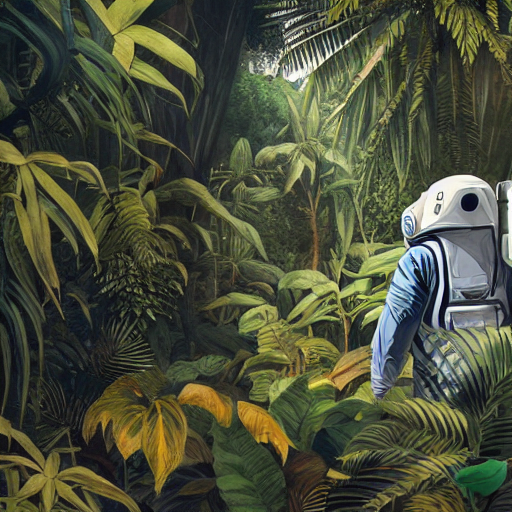

In [4]:
generator = torch.Generator("cuda").manual_seed(2222111)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image